# Streaming Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_name = 'stream_50223_samples.parquet'
df_stream_reviews = pd.read_parquet(file_name)
len(df_stream_reviews)

50223

In [3]:
file_name = 'metadata_main_cat.parquet'
df_asins_main_cat = pd.read_parquet(file_name)
asins_main_cat = {k: v for k, v in df_asins_main_cat.values}
len(df_asins_main_cat)

14741571

In [4]:
def get_main_cat_count(df):
    df_main_cat_data = [{'asin': asin, 'main_cat': asins_main_cat.get(asin, '')} for asin in df['asin']]
    df_main_cat_count = pd.DataFrame(df_main_cat_data).groupby('main_cat').count().to_dict()['asin']
    return df_main_cat_count

In [5]:
stream_review_cat_count = get_main_cat_count(df_stream_reviews)
main_cats = list(dict(sorted(stream_review_cat_count.items(), key=lambda x:x[1], reverse=True)).keys())


Unique stream reviews

In [6]:
df_unique_stream_reviews = df_stream_reviews.drop_duplicates()
unique_stream_review_cat_count = get_main_cat_count(df_unique_stream_reviews)
len(df_unique_stream_reviews)

40222

Unique stream products (`asins`)

In [7]:
df_unique_stream_reviews_asins = df_stream_reviews.drop_duplicates(['asin'])
unique_stream_review_cat_asins_count = get_main_cat_count(df_unique_stream_reviews_asins)
len(df_unique_stream_reviews_asins)

3739

Data prep for visualization

In [8]:
stream_review_cat_count_vals = []
unique_stream_review_cat_vals = []
unique_stream_review_cat_asins_vals = []

for main_cat in main_cats:
    stream_review_cat_count_vals.append(stream_review_cat_count[main_cat])
    unique_stream_review_cat_vals.append(unique_stream_review_cat_count[main_cat])
    unique_stream_review_cat_asins_vals.append(unique_stream_review_cat_asins_count[main_cat])

reviews_count ={
    'All stream reviews': np.array(stream_review_cat_count_vals),
    'Unique stream reviews': np.array(unique_stream_review_cat_vals),
    'Unique asins': np.array(unique_stream_review_cat_asins_vals)
}

Plot

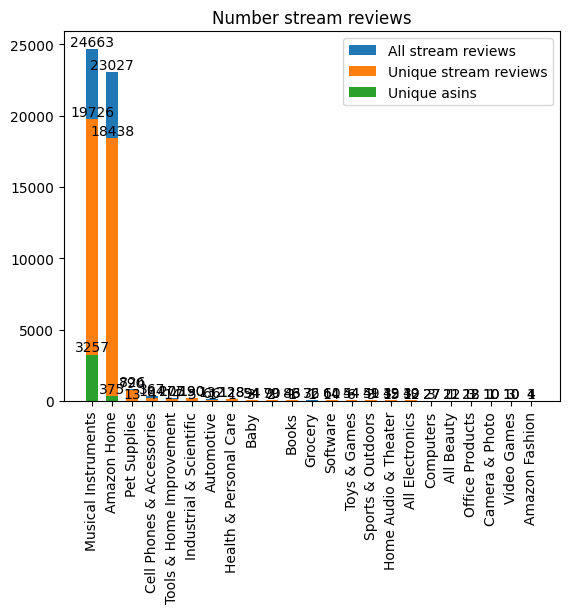

In [9]:
fig, ax = plt.subplots()
bottom = np.zeros(len(main_cats))
width = 0.6 

for review_type, review_count in reviews_count.items():
    p = ax.bar(main_cats, review_count, width, label=review_type, bottom=bottom)
    ax.bar_label(p, label_type='edge')

ax.set_title('Number stream reviews')
ax.legend()

plt.xticks(rotation=90)
plt.show()